# AJAX (ASynchronous Javascript And XML)
- 자바스크립트를 이용해 서버와 브라우저가 비동기 방식으로 데이터를 교환할 수 있는 통신기능
- 클라이언트와 서버간에 JSON 이나 XML 데이터를 주고받음.
- 비동기 방식을 이용하면 필요한 데이터만 불러오면서 리소스 낭비를 줄일 수 있다.
- AJAX는 XMLHttpRequest객체를 통해 서버에 request한다.
- JSON이나 XML형태로 필요한 데이터만 받아 갱신하기 때문에 그만큼의 자원과 시간을 아낄 수 있다.

# 부동산 정보 크롤링 
- 데이터 출처 조인스 : http://price.joinsland.joins.com/
- let's try 강남구 대치동...

```
import pandas as pd
url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'
dfs = pd.read_html(url, 'lxml')   # read html tables
dfs 
```
- html source 에는 table 이 보이지만 pandas.read_html()로 읽었을 때 테이블이 읽히지 않는다. (Error: No tables found)

In [1]:
import pandas as pd
url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'

try:
    dfs = pd.read_html(url, 'lxml')   # read html tables
except:
    print ("Error: No tables found.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Starting with pandas version 2.0 all arguments of read_html except for the argument 'io' will be keyword-only
  """


Error: No tables found.


- HTML source 를 가지고 와서 확인해 보아도 보이지 않는다.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = 'https://maemul.joinsland.joins.com/area/?mcateGroup=A1&areaCode=1168010600'
link = requests.get(url)
soup = BeautifulSoup(link.text, 'html.parser')

In [3]:
soup.table  # no table found

In [4]:
# soup   # -> source 에 <table> 이 보이지 않는다.

## 페이지 소스 확인

메뉴에서 "보기 > 개발자 보기 > 소스보기" 선택하여 페이지 소스를 확인

크롬 개발자 도구로 table과 데이터가 보이지만, 소스 보기를 하면 소스에는 데이터가 보이지 않는다

이 처럼 크롬개발자 도구에서는 데이터가 있으나, 페이지 소스에는 데이터가 없는 경우는 다음 두 가지 중의 하나
* Ajax로 데이터를 요청하여 데이터를 표현 &rarr; 데이터 요청 URL을 따로 분석
* JavaScript가 실행되어 데이터를 표현 &rarr; Selenium 사용

Ajax (Asynchronous JavaScript and XML, 에이잭스)는 자바스크립트로 요청하는 비동기 데이터 요청.

## Ajax 데이터 요청 확인
* Network 탭을 열고
* 검색조건이 달라질 때('동'을 선택), 어떤 데이터가 오가는지 살펴본다
* 요청/응답 데이터들 중에 데이터기 포함되어 오가는지 살펴본다.

    

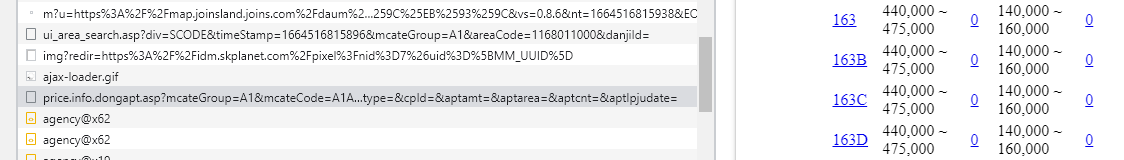

## < CORS Error 발생 의경우>
- CORS(Cross-Origin Resource Sharing) policy eror 발생하면
  - Google 에서 'Allow CORS: Access-Control-Allow-Origin' 을 찾아 그 사이트에 가서 Chrome 에 Extension 설치를 한다. (It lets you easily perform cross-domain Ajax requests in web applications.)
  - Chrome 의 우측 상단의 Extension 을 클릭해서 "Allow CORS" 을 on/off 조정할 수 있다.

## joins.com/ajax
여기서는 다음 URL로 데이터가 요청/응답 되었음을 확인할 수 있다

"https://maemul.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011000&danjiId=&ptype=&cpId=&aptamt=&aptarea=&aptcnt=&aptIpjudate="

<img width="70%" src="http://i.imgur.com/wAzM0TP.png">
    

In [9]:
url = "https://maemul.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168011000"
dfs = pd.read_html(url, encoding='utf-8')

In [10]:
dfs[0]

단지명 면적 (㎡)           매매가 (만원)  매물           전세가 (만원)  \
0             미성1차(아파트)   111A  325,000 ~ 375,000   0   87,500 ~ 100,000   
1             미성1차(아파트)   112B  325,000 ~ 375,000   0   87,500 ~ 100,000   
2             미성1차(아파트)   112C  325,000 ~ 375,000   0   87,500 ~ 100,000   
3             미성1차(아파트)   112D  325,000 ~ 375,000   0   87,500 ~ 100,000   
4             미성1차(아파트)    163  440,000 ~ 475,000   0  140,000 ~ 160,000   
..                  ...    ...                ...  ..                ...   
102  현대65동(대림아크로빌)(아파트)   282A  775,000 ~ 850,000   0  220,000 ~ 245,000   
103           현대8차(아파트)    115  335,000 ~ 380,000   0    82,500 ~ 95,000   
104           현대8차(아파트)   119A  335,000 ~ 380,000   0    82,500 ~ 95,000   
105           현대8차(아파트)   119B  335,000 ~ 380,000   0    82,500 ~ 95,000   
106           현대8차(아파트)    177  460,000 ~ 495,000   0  152,500 ~ 175,000   

     매물.1  문의처  
0       0  NaN  
1       0  NaN  
2       0  NaN  
3       0  NaN  
4       0  NaN  
..    ...  ...  
102     0  NaN  
103     0  NaN  
104     0  NaN  
105     0  NaN  
106     0  NaN  

[107 rows x 7 columns]

다음 URL의 인자로 다음 값들이 전달.

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
* mcateGroup: A1=아파트, A6=오피스텔
* mcateCode: A1A3A4
* areaCode=1168010600

결과적으로 지역코드(areaCode)만 지정하면 가격  데이터를 가져올 수 있다.

## 지역이름과 코드
(참고) joinsland.joins.com 자체에도 법정동을 조회하는 내용이 있으나 데이터가 온전한 JSON 이 아니어서 가공하기 어렵다

In [11]:
# 구/시/군 (MCODE) 코드 가져오기

import requests

# 서울특별시 하위 '구/시/군' 읽기
area_code = '110000000' 
url = 'http://price.joinsland.joins.com/ajax/area_search.asp?div=MCODE&areaCode=' + area_code
r = requests.get(url)
print(r.text)

# JSON처럼 보이지만 JSON 규격을 따르지 않고 있다

[{seq:'1', idx:1, name:'강남구', label:'강남구', value:'1168000000', cnt:'0'},{seq:'2', idx:2, name:'강동구', label:'강동구', value:'1174000000', cnt:'0'},{seq:'3', idx:3, name:'강북구', label:'강북구', value:'1130500000', cnt:'0'},{seq:'4', idx:4, name:'강서구', label:'강서구', value:'1150000000', cnt:'0'},{seq:'5', idx:5, name:'관악구', label:'관악구', value:'1162000000', cnt:'0'},{seq:'6', idx:6, name:'광진구', label:'광진구', value:'1121500000', cnt:'0'},{seq:'7', idx:7, name:'구로구', label:'구로구', value:'1153000000', cnt:'0'},{seq:'8', idx:8, name:'금천구', label:'금천구', value:'1154500000', cnt:'0'},{seq:'9', idx:9, name:'노원구', label:'노원구', value:'1135000000', cnt:'0'},{seq:'10', idx:10, name:'도봉구', label:'도봉구', value:'1132000000', cnt:'0'},{seq:'11', idx:11, name:'동대문구', label:'동대문구', value:'1123000000', cnt:'0'},{seq:'12', idx:12, name:'동작구', label:'동작구', value:'1159000000', cnt:'0'},{seq:'13', idx:13, name:'마포구', label:'마포구', value:'1144000000', cnt:'0'},{seq:'14', idx:14, name:'서대문구', label:'서대문구', value:'1141000000', 

In [12]:
r.text

"[{seq:'1', idx:1, name:'강남구', label:'강남구', value:'1168000000', cnt:'0'},{seq:'2', idx:2, name:'강동구', label:'강동구', value:'1174000000', cnt:'0'},{seq:'3', idx:3, name:'강북구', label:'강북구', value:'1130500000', cnt:'0'},{seq:'4', idx:4, name:'강서구', label:'강서구', value:'1150000000', cnt:'0'},{seq:'5', idx:5, name:'관악구', label:'관악구', value:'1162000000', cnt:'0'},{seq:'6', idx:6, name:'광진구', label:'광진구', value:'1121500000', cnt:'0'},{seq:'7', idx:7, name:'구로구', label:'구로구', value:'1153000000', cnt:'0'},{seq:'8', idx:8, name:'금천구', label:'금천구', value:'1154500000', cnt:'0'},{seq:'9', idx:9, name:'노원구', label:'노원구', value:'1135000000', cnt:'0'},{seq:'10', idx:10, name:'도봉구', label:'도봉구', value:'1132000000', cnt:'0'},{seq:'11', idx:11, name:'동대문구', label:'동대문구', value:'1123000000', cnt:'0'},{seq:'12', idx:12, name:'동작구', label:'동작구', value:'1159000000', cnt:'0'},{seq:'13', idx:13, name:'마포구', label:'마포구', value:'1144000000', cnt:'0'},{seq:'14', idx:14, name:'서대문구', label:'서대문구', value:'1141000000',

## 법정동 이름과 코드
부동산 정보등에는 법정동 코드가 사용된다. 
* 법정동 코드(8자리)
* 2(시/도) + 2자리(구/군/구) + 2자리(읍/면/동) + 2자리(리/단지)

법정동 전체 코드는 아래 링크

* https://goo.gl/tM6r3v

상세한 내용은 다음 링크에 설명을 참고

* http://nbviewer.jupyter.org/urls/financedata.github.io/posts/korea-area-code.ipynb

## 정리된 사이트
- 위에서 본 것처럼 Joins 자체에 있는 법정동을 조회하지 않고 아래 사이트에 정리되어 있는 것을 이용해서 사용.

In [13]:
import pandas as pd
df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
df_areacode.head()

법정동코드           법정동명 폐지여부
0  1100000000          서울특별시   존재
1  1111000000      서울특별시 종로구   존재
2  1111010100  서울특별시 종로구 청운동   존재
3  1111010200  서울특별시 종로구 신교동   존재
4  1111010300  서울특별시 종로구 궁정동   존재

In [14]:
df_areacode.dtypes

법정동코드    object
법정동명     object
폐지여부     object
dtype: object

In [16]:
### 메인 코드 시작 ###

import pandas as pd

def get_areacode():
    df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
    df_areacode = df_areacode[df_areacode['폐지여부'] == '존재']
    df_areacode = df_areacode[['법정동코드', '법정동명']]
    return df_areacode

def get_province():
    df_areacode = get_areacode()
    df_province = df_areacode[ df_areacode['법정동코드'].str.contains('\d{2}0{8}|36110{6}')]   # \d: digit(숫자)
                                                                                               # 0{8}: 0 이 8개
    return df_province

In [17]:
df_areacode = get_areacode()
df_areacode.head()

법정동코드           법정동명
0  1100000000          서울특별시
1  1111000000      서울특별시 종로구
2  1111010100  서울특별시 종로구 청운동
3  1111010200  서울특별시 종로구 신교동
4  1111010300  서울특별시 종로구 궁정동

In [18]:
df_province = get_province()
df_province.head()

법정동코드   법정동명
0     1100000000  서울특별시
2615  2600000000  부산광역시
2912  2700000000  대구광역시
3244  2800000000  인천광역시
3579  2900000000  광주광역시

In [19]:
df_areacode[ df_areacode['법정동명'].str.contains('서울특별시 강남구') ]

법정동코드            법정동명
1003  1168000000       서울특별시 강남구
1037  1168010100   서울특별시 강남구 역삼동
1039  1168010300   서울특별시 강남구 개포동
1040  1168010400   서울특별시 강남구 청담동
1041  1168010500   서울특별시 강남구 삼성동
1042  1168010600   서울특별시 강남구 대치동
1043  1168010700   서울특별시 강남구 신사동
1044  1168010800   서울특별시 강남구 논현동
1045  1168011000  서울특별시 강남구 압구정동
1046  1168011100   서울특별시 강남구 세곡동
1047  1168011200   서울특별시 강남구 자곡동
1048  1168011300   서울특별시 강남구 율현동
1049  1168011400   서울특별시 강남구 일원동
1050  1168011500   서울특별시 강남구 수서동
1053  1168011800   서울특별시 강남구 도곡동

# Direct Access with pd.read_html()
- read table from:
http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
  * mcateGroup A1=아파트, A6=오피스텔
  * mcateCode: A1A3A4
  * areaCode=1168010600 # 강남구 대치동

In [24]:
import pandas as pd
url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'
    
print(url)

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168010600


In [25]:
dfs = pd.read_html(url, encoding='utf-8')      # list

In [26]:
type(dfs), len(dfs), type(dfs[0])

(list, 1, pandas.core.frame.DataFrame)

In [27]:
dfs[0].head(10)

단지명 면적 (㎡)           매매가 (만원)  매물           전세가 (만원)  매물.1  \
0         개포우성1차(아파트)    102  295,000 ~ 315,000   3  115,000 ~ 142,500     2   
1         개포우성1차(아파트)    148  395,000 ~ 422,500   0  172,500 ~ 195,000     0   
2         개포우성1차(아파트)    181  455,000 ~ 497,500   4  195,000 ~ 230,000     3   
3         개포우성1차(아파트)    214  500,000 ~ 545,000   0  255,000 ~ 285,000     0   
4         개포우성2차(아파트)    101  295,000 ~ 317,500   0  115,000 ~ 142,500     3   
5         개포우성2차(아파트)    146  397,500 ~ 437,500   4  172,500 ~ 195,000     1   
6         개포우성2차(아파트)    180  450,000 ~ 505,000   1  195,000 ~ 230,000     0   
7  대치대우아이빌멤버스4차(주상복합)     31    26,500 ~ 27,750   0    24,000 ~ 25,500     0   
8  대치대우아이빌멤버스4차(주상복합)     39    30,750 ~ 32,750   0    26,000 ~ 28,000     0   
9  대치대우아이빌멤버스4차(주상복합)     44    34,500 ~ 36,500   0    29,500 ~ 32,000     0   

   문의처  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  
6  NaN  
7  NaN  
8  NaN  
9  NaN

# By parsing HTML source

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'

r = requests.get(url)

soup = BeautifulSoup(r.text, 'lxml')        # lxml is a xml parser

In [29]:
r

<Response [200]>

In [30]:
table = soup.find('table')
trs = table.tbody.find_all('tr')

In [31]:
len(trs), trs[0]

(158, <tr>
 <td class="txt_danzi" rowspan="4" valign="top"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244">개포우성1차</a><br/>(아파트)</td>
 <td class="num_area"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244&amp;ptype=1" style="color:#6284d4">102</a></td>
 <td class="num_price">295,000 ~ 315,000 </td>
 <td class="num_maemul"><a href="javascript:goMaemul('1','244')">3</a></td>
 <td class="num_price">115,000 ~ 142,500</td>
 <td class="num_maemul"><a href="javascript:goMaemul('2','244')">2</a></td>
 <!--td class="check"><input name="" type="checkbox" value="" /></td-->
 <td class="txt_inquiry" rowspan="4" valign="top">
 </td>
 </tr>)

``` 
The <table> tag defines an HTML table.
- Each table row is defined with a <tr> tag. 
  Each table header is defined with a <th> tag. 
  Each table data/cell is defined with a <td> tag.
- By default, the text in <th> elements are bold and centered.
- By default, the text in <td> elements are regular and left-aligned.
```

In [32]:
rowspan_val = ''

for tr in trs[:20]: # 처음 20개 확인
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):    # rowspan -> row를 합칠때 사용
        rowspan_val = tds[0].text
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text

    print('{:<20} {:>5} {:>20} {:>5} {:>20} {:>5}'.format(단지명, 면적, 매매가, 매물, 전세가, 전세_매물))

개포우성1차(아파트)            102   295,000 ~ 315,000      3    115,000 ~ 142,500     2
개포우성1차(아파트)            148   395,000 ~ 422,500      0    172,500 ~ 195,000     0
개포우성1차(아파트)            181   455,000 ~ 497,500      4    195,000 ~ 230,000     3
개포우성1차(아파트)            214   500,000 ~ 545,000      0    255,000 ~ 285,000     0
개포우성2차(아파트)            101   295,000 ~ 317,500      0    115,000 ~ 142,500     3
개포우성2차(아파트)            146   397,500 ~ 437,500      4    172,500 ~ 195,000     1
개포우성2차(아파트)            180   450,000 ~ 505,000      1    195,000 ~ 230,000     0
대치대우아이빌멤버스4차(주상복합)      31     26,500 ~ 27,750      0      24,000 ~ 25,500     0
대치대우아이빌멤버스4차(주상복합)      39     30,750 ~ 32,750      0      26,000 ~ 28,000     0
대치대우아이빌멤버스4차(주상복합)      44     34,500 ~ 36,500      0      29,500 ~ 32,000     0
대치대우아이빌멤버스4차(주상복합)     44A     34,500 ~ 36,500      0      29,500 ~ 32,000     1
대치대우아이빌멤버스4차(주상복합)     45B     34,500 ~ 36,500      0      29,500 ~ 32,000     0
대치대우아이빌멤버스4차(주상복합)     51A  

In [33]:
# 참고 (한글로 변수 OK)
매매 = 500; 전세 = 90
print(매매+전세)

590


-   Dataframe 으로 만들기

In [34]:
# DataFrame으로 만들기
values_list = []

table = soup.find('table', attrs={'class':'tbl_compare'})
trs = table.tbody.find_all('tr')

rowspan_val = ''

for tr in trs:
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):
        rowspan_val = tds[0].text
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text

    values_list.append([단지명, 면적, 매매가, 매물, 전세가, 전세_매물])
    
cols = ['단지명', '면적', '매매가', '매물', '전세가', '전세가_매물']   
df = pd.DataFrame(values_list, columns=cols)

print ("건수:", len(df))
df.head(20)    # 앞의 pd.read_html() 로 읽은 것과 포맷이 약간 다름.

건수: 158


단지명   면적                 매매가 매물                전세가 전세가_매물
0          개포우성1차(아파트)  102  295,000 ~ 315,000   3  115,000 ~ 142,500      2
1          개포우성1차(아파트)  148  395,000 ~ 422,500   0  172,500 ~ 195,000      0
2          개포우성1차(아파트)  181  455,000 ~ 497,500   4  195,000 ~ 230,000      3
3          개포우성1차(아파트)  214  500,000 ~ 545,000   0  255,000 ~ 285,000      0
4          개포우성2차(아파트)  101  295,000 ~ 317,500   0  115,000 ~ 142,500      3
5          개포우성2차(아파트)  146  397,500 ~ 437,500   4  172,500 ~ 195,000      1
6          개포우성2차(아파트)  180  450,000 ~ 505,000   1  195,000 ~ 230,000      0
7   대치대우아이빌멤버스4차(주상복합)   31    26,500 ~ 27,750   0    24,000 ~ 25,500      0
8   대치대우아이빌멤버스4차(주상복합)   39    30,750 ~ 32,750   0    26,000 ~ 28,000      0
9   대치대우아이빌멤버스4차(주상복합)   44    34,500 ~ 36,500   0    29,500 ~ 32,000      0
10  대치대우아이빌멤버스4차(주상복합)  44A    34,500 ~ 36,500   0    29,500 ~ 32,000      1
11  대치대우아이빌멤버스4차(주상복합)  45B    34,500 ~ 36,500   0    29,500 ~ 32,000      0
12  대치대우아이빌멤버스4차(주상복합)  51A    46,500 ~ 52,000   0    38,500 ~ 42,500      0
13  대치대우아이빌멤버스4차(주상복합)  51B    46,500 ~ 52,000   0    38,500 ~ 42,500      0
14  대치대우아이빌멤버스4차(주상복합)   53    48,000 ~ 53,000   1    40,500 ~ 44,000      0
15  대치대우아이빌멤버스4차(주상복합)   58    51,000 ~ 55,000   0    41,500 ~ 45,000      0
16  대치대우아이빌멤버스4차(주상복합)   63    66,000 ~ 71,500   0    44,500 ~ 49,500      0
17  대치대우아이빌멤버스4차(주상복합)   68    66,000 ~ 71,500   0    44,500 ~ 49,500      0
18    대치대우아이빌명문가(주상복합)  41A    31,500 ~ 33,500   0    30,000 ~ 32,000      0
19    대치대우아이빌명문가(주상복합)  43B    31,500 ~ 33,500   1    30,000 ~ 32,000      0

# 함수로 만들기

In [35]:
# 조인스부동산 아파트 조회

import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_areacode():
    df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'법정동코드':str, '법정동명':str})
    df_areacode = df_areacode[df_areacode['폐지여부'] == '존재']
    df_areacode = df_areacode[['법정동코드', '법정동명']]
    return df_areacode

def get_province():
    df_areacode = get_areacode()
    df_province = df_areacode[ df_areacode['법정동코드'].str.contains('\d{2}0{8}|36110{6}')]
    return df_province


def joins_realasset(areacode=''):
    url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + areacode

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    values_list = []

    table = soup.find('table', attrs={'class':'tbl_compare'})
    trs = table.tbody.find_all('tr')
    rowspan_val = ''

    for tr in trs:
        tds = tr.find_all('td')
        if tds[0].has_attr('rowspan'):
            rowspan_val = tds[0].text
            단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
        else:
            단지명, 면적, 매매가, 매물, 전세가, 전세_매물 = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text
        
        values_list.append([단지명, 면적, 매매가, 매물, 전세가, 전세_매물])

    cols = ['단지명', '면적', '매매가', '매물', '전세가', '전세가_매물']   
    df = pd.DataFrame(values_list, columns=cols)
    return df

# 검색과 활용

In [36]:
df_areacode = get_areacode()

In [37]:
area = '신사동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]
area_code

법정동코드           법정동명
582   1138010900  서울특별시 은평구 신사동
1043  1168010700  서울특별시 강남구 신사동

In [38]:
area = '강남구 신사동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
area_code

'1168010700'

In [39]:
joins_realasset(area_code)

단지명    면적                 매매가 매물                전세가 전세가_매물
0      대원칸타빌(아파트)    85  130,000 ~ 150,000   0    51,000 ~ 65,000      0
1      대원칸타빌(아파트)  107B  150,000 ~ 162,500   0    82,500 ~ 92,500      0
2      대원칸타빌(아파트)   123  170,000 ~ 180,000   0   90,000 ~ 102,500      0
3      대원칸타빌(아파트)   144  192,500 ~ 212,500   0  102,500 ~ 117,500      0
4      로데오현대(아파트)    73   97,500 ~ 107,500   0    52,000 ~ 60,500      0
5      로데오현대(아파트)   114  140,000 ~ 160,000   0    70,000 ~ 80,000      0
6      로데오현대(아파트)  122A  150,000 ~ 170,000   0    77,500 ~ 90,000      0
7         신성(아파트)    72  132,500 ~ 145,000   0    66,500 ~ 79,000      0
8         신성(아파트)    98  170,000 ~ 180,000   0   77,500 ~ 100,000      0
9   압구정하이츠파크(아파트)   234  455,000 ~ 495,000   0  260,000 ~ 297,500      0
10  압구정하이츠파크(아파트)   270  507,500 ~ 547,500   0  275,000 ~ 315,000      0
11      현대맨션(아파트)   147  262,500 ~ 272,500   0  107,500 ~ 125,000      0
12      현대맨션(아파트)   147  262,500 ~ 272,500   0  107,500 ~ 125,000      0
13      현대맨션(아파트)   159  295,000 ~ 305,000   0  127,500 ~ 137,500      0
14      현대맨션(아파트)   162  295,000 ~ 305,000   0  127,500 ~ 137,500      0
15      현대맨션(아파트)   191  297,500 ~ 307,500   0  130,000 ~ 140,000      0
16      현대맨션(아파트)   194  297,500 ~ 307,500   0  130,000 ~ 140,000      0
17      현대맨션(아파트)  195B  297,500 ~ 307,500   0  130,000 ~ 140,000      0
18      현대맨션(아파트)  213A  392,500 ~ 412,500   0  160,000 ~ 180,000      0
19      현대맨션(아파트)  212B  392,500 ~ 412,500   0  160,000 ~ 180,000      0
20      현대맨션(아파트)  213C  392,500 ~ 412,500   0  160,000 ~ 180,000      0
21      현대맨션(아파트)   218  392,500 ~ 412,500   0  160,000 ~ 180,000      0

In [40]:
area = '노원구 월계동'
area_code = df_areacode[ df_areacode['법정동명'].str.contains(area) ]['법정동코드'].values[0]
print(area_code)
df = joins_realasset(area_code)
df[df['단지명'].str.contains('현대')]

1135010200


단지명   면적                 매매가 매물              전세가 전세가_매물
127  현대(929)(아파트)   85    69,500 ~ 73,500   0  35,000 ~ 41,500      0
128  현대(929)(아파트)  109    86,500 ~ 94,000   0  47,000 ~ 52,000      0
129  현대(929)(아파트)  143  101,000 ~ 110,000   0  56,500 ~ 61,500      0

In [ ]:
# end